#  02. Exploratory Analysis: Finding relation between values and variables

Conduct an exploratory visual analysis to identify relationships between variables. Objective of this analysis to answer the below questionairs.

- **Objective 2:**

>   Which countries are affected most by child nutrition(stunting, overweight, wasting and severe wasting)?

>   Hypothesis: Countries with low income have the highest child malnutrition count.

>	Datasource:

        UNICEF_Global_Joint-Malnutrition-Estimates
        UNICEF_Global_Databases_Overweight
        UNICEF_Global_Databases_Stunting
        UNICEF_Global_Databases_Databases_Wasting

- **Objective 4:**

>   Find the trend in countries income and malnutrition growth.

>   Hypothesis:  countries income and malnutrition growth worldwide affected with countries income.

>   Datasource:

        UNICEF_Global_Databases_Stunting

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Basic Analysis on the new data set 

The dataset used for the analysis 

\02 Data\Prepared Data\01 CSV\New\UNICEF_Database_wasting_stunting.csv


### Data Columns
- Geographic area 

Countries name
    
- YEAR	          

Sampling data from 2001 to 2022
    
- Indicator	

Height-for-age <-2 SD (stunting)

Weight-for-height <-2 SD (wasting)
    
Weight-for-height <-3 SD (Sever wasting)
    
- Sex	

Male
Female
Total: Contains combined observation of Male and Female 
    
- Average of OBS_VALUE

Percentage of age under-fives falling under (moderate and severe) Stunting and Wasting for the reference population.

In [2]:
path = r'C:\Users\mutta\Documents\Project 6'
path
join = os.path.join(path, 
                    '02 Data',
                    'Prepared Data', 
                    '01 CSV',
                    '02. Exploring Relationships',
                    'UNICEF_Database_wasting_stunting.csv')

pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv(join, index_col = False, encoding= 'unicode_escape')
df.round(2)

,Geographic area,YEAR,Indicator,Sex,Average of OBS_VALUE
0,Afghanistan,2004,Height-for-age <-2 SD (stunting),Female,58.50
1,Afghanistan,2004,Height-for-age <-2 SD (stunting),Male,60.00
2,Afghanistan,2004,Height-for-age <-2 SD (stunting),Total,59.30
3,Afghanistan,2004,Weight-for-height <-2 SD (wasting),Total,9.10
4,Afghanistan,2004,Weight-for-height <-3 SD (severe wasting),Total,3.80
...,...,...,...,...,...
7769,Zimbabwe,2019,Weight-for-height <-2 SD (wasting),Male,3.00
7770,Zimbabwe,2019,Weight-for-height <-2 SD (wasting),Total,2.90
7771,Zimbabwe,2019,Weight-for-height <-3 SD (severe wasting),Female,0.30
7772,Zimbabwe,2019,Weight-for-height <-3 SD (severe wasting),Male,0.40


In [3]:
df.head()

,Geographic area,YEAR,Indicator,Sex,Average of OBS_VALUE
0,Afghanistan,2004,Height-for-age <-2 SD (stunting),Female,58.50
1,Afghanistan,2004,Height-for-age <-2 SD (stunting),Male,60.00
2,Afghanistan,2004,Height-for-age <-2 SD (stunting),Total,59.30
3,Afghanistan,2004,Weight-for-height <-2 SD (wasting),Total,9.10
4,Afghanistan,2004,Weight-for-height <-3 SD (severe wasting),Total,3.80


In [4]:
df.describe()

,YEAR,Average of OBS_VALUE
count,7774.00,7774.00
mean,2010.53,10.96
std,5.53,11.76
min,2001.00,0.00
25%,2006.00,2.70
50%,2010.00,7.00
75%,2015.00,14.30
max,2022.00,61.80


In [5]:
print(df.columns)

Index(['Geographic area', 'YEAR', 'Indicator', 'Sex', 'Average of OBS_VALUE'], dtype='object')


In [6]:
dimension = df.shape
print('rows:',dimension[0])
print('column:',dimension[1])

rows: 7774
column: 5


In [7]:
print(df.dtypes)

Geographic area          object
YEAR                      int64
Indicator                object
Sex                      object
Average of OBS_VALUE    float64
dtype: object


In [8]:
df.isnull().sum()

Geographic area         0
YEAR                    0
Indicator               0
Sex                     0
Average of OBS_VALUE    0
dtype: int64

In [9]:
def validate_mixed_type_check(df):
    for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print ('Column', col, ' contains mixed types')
      else:
        print('Column', col ,'  contains same data types')
        
# 3. validate_mixed_type_check(df_orders)
validate_mixed_type_check(df)

Column Geographic area   contains same data types
Column YEAR   contains same data types
Column Indicator   contains same data types
Column Sex   contains same data types
Column Average of OBS_VALUE   contains same data types


In [10]:
# Check for duplicate values
df_dups = df[df.duplicated()]
df_dups

,Geographic area,YEAR,Indicator,Sex,Average of OBS_VALUE


In [11]:
df.groupby(['Geographic area']).count()

,YEAR,Indicator,Sex,Average of OBS_VALUE
Geographic area,,,,
Afghanistan,23,23,23,23
Albania,42,42,42,42
Algeria,51,51,51,51
Andorra,15,15,15,15
Angola,29,29,29,29
...,...,...,...,...
Venezuela (Bolivarian Republic of),33,33,33,33
Viet Nam,124,124,124,124
Yemen,36,36,36,36


##### Total Number of Countries: 187 

In [12]:
df.groupby(['YEAR']).count()

,Geographic area,Indicator,Sex,Average of OBS_VALUE
YEAR,,,,
2001,299,299,299,299
2002,329,329,329,329
2003,311,311,311,311
2004,372,372,372,372
2005,419,419,419,419
2006,517,517,517,517
2007,396,396,396,396
2008,348,348,348,348
2009,390,390,390,390


#### The set contains observation values from 2001 to 2022

### Top 10 Countries Most Affected by Child Nutrition(Stunting)

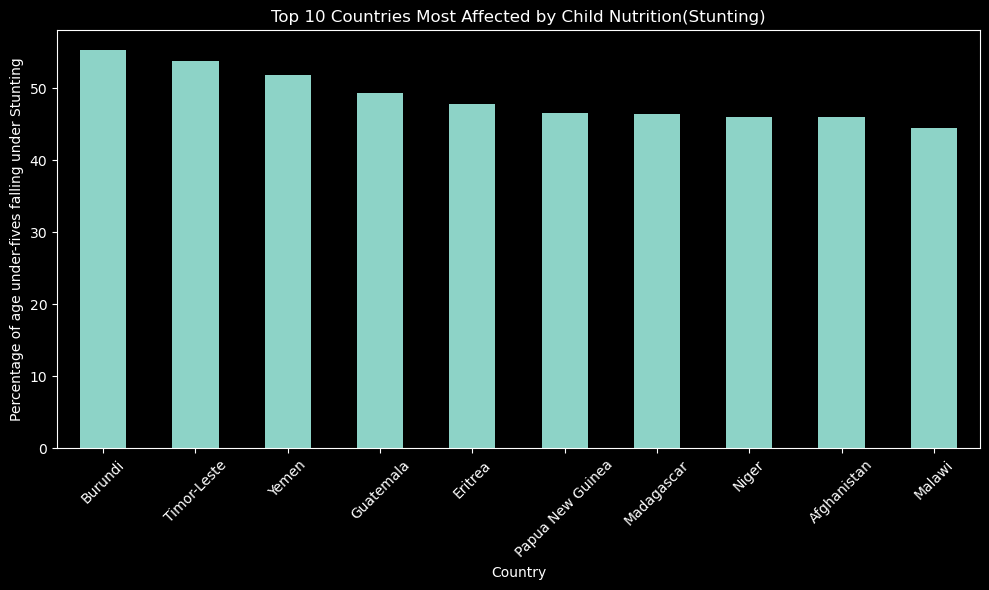

In [13]:

# Set the dark background style
plt.style.use('dark_background')

stunting_country_data = df[(df['Indicator'] == 'Height-for-age <-2 SD (stunting)') ]

# Group the data by country and calculate the average values for child nutrition indicators
country_data = stunting_country_data.groupby('Geographic area')['Average of OBS_VALUE'].mean()

# Sort the countries based on the aveage values in descending order
sorted_countries = country_data.sort_values(ascending=False)

# Select the top N countries to plot
top_10_stunting_countries = sorted_countries.head(10)  # Adjust the number as per your preference

# Plot the data
plt.figure(figsize=(10, 6))
top_10_stunting_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Percentage of age under-fives falling under Stunting')
plt.title('Top 10 Countries Most Affected by Child Nutrition(Stunting)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
top_10_stunting_countries.head(20)

Geographic area
Burundi            55.27
Timor-Leste        53.82
Yemen              51.82
Guatemala          49.34
Eritrea            47.75
Papua New Guinea   46.53
Madagascar         46.47
Niger              46.06
Afghanistan        45.96
Malawi             44.48
Name: Average of OBS_VALUE, dtype: float64

### Top 10 countries that are most affected by wasting

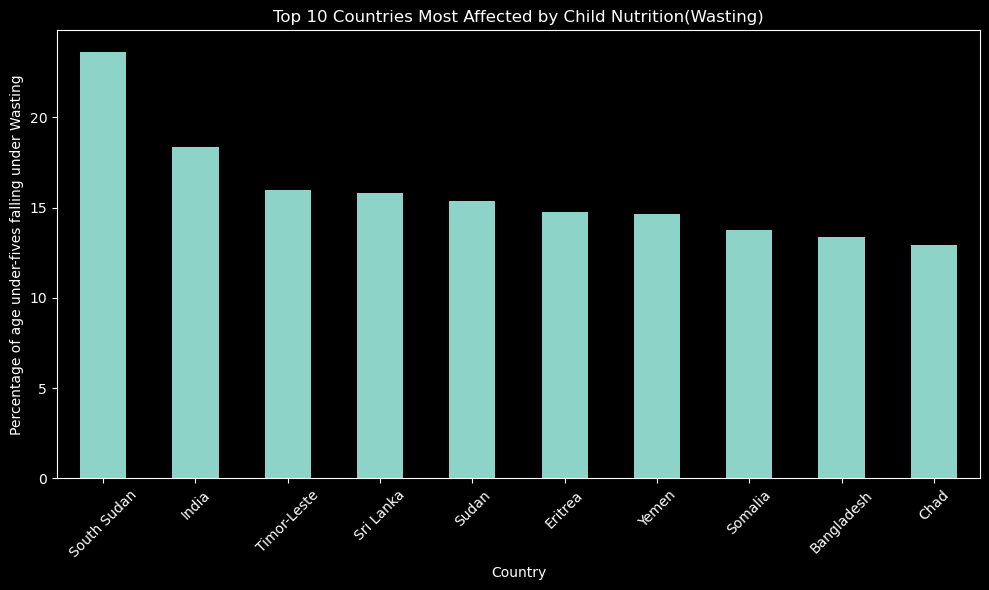

In [15]:

# Set the dark background style
plt.style.use('dark_background')

wasting_country_data = df[(df['Indicator'] == 'Weight-for-height <-2 SD (wasting)') |
                           (df['Indicator'] == 'Weight-for-height <-3 SD (Sever wasting)')]

# Group the data by country and calculate the average values for child nutrition indicators
country_data = wasting_country_data.groupby('Geographic area')['Average of OBS_VALUE'].mean()

# Sort the countries based on the aveage values in descending order
sorted_countries = country_data.sort_values(ascending=False)

# Select the top N countries to plot
top_10_wasting_countries = sorted_countries.head(10)  # Adjust the number as per your preference

# Plot the data
plt.figure(figsize=(10, 6))
top_10_wasting_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Percentage of age under-fives falling under Wasting')
plt.title('Top 10 Countries Most Affected by Child Nutrition(Wasting)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
top_10_wasting_countries.head(20)

Geographic area
South Sudan   23.63
India         18.37
Timor-Leste   15.98
Sri Lanka     15.83
Sudan         15.38
Eritrea       14.77
Yemen         14.67
Somalia       13.75
Bangladesh    13.37
Chad          12.91
Name: Average of OBS_VALUE, dtype: float64

### Top 10 countries that are most affected by Stunting and Wasting

<Figure size 1200x600 with 0 Axes>

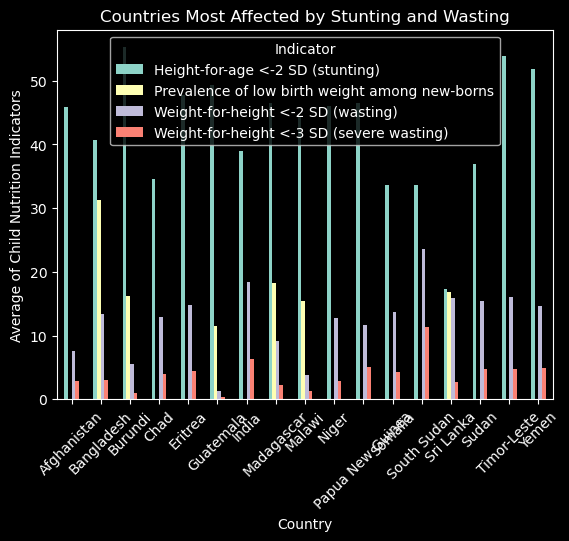

In [17]:


# Set the dark background style
plt.style.use('dark_background')


# Filter the data for stunting and wasting indicators
stunting_data = df[df['Indicator'] == 'Height-for-age <-2 SD (stunting)']
wasting_data = df[df['Indicator'] == 'Weight-for-height <-2 SD (wasting)']

# Group the stunting data by country and calculate the average values
stunting_countries = stunting_data.groupby('Geographic area')['Average of OBS_VALUE'].mean()

# Group the wasting data by country and calculate the average values
wasting_countries = wasting_data.groupby('Geographic area')['Average of OBS_VALUE'].mean()

# Select the top N countries most affected by stunting
top_stunting_countries = stunting_countries.sort_values(ascending=False).head(10)

# Select the top N countries most affected by wasting
top_wasting_countries = wasting_countries.sort_values(ascending=False).head(10)

# Combine the top countries affected by stunting and wasting
top_countries = top_stunting_countries.index.union(top_wasting_countries.index)

# Filter the original dataset for the top countries
top_countries_data = df[df['Geographic area'].isin(top_countries)]

# Aggregate the duplicate entries by taking the mean
pivot_data = top_countries_data.pivot_table(index='Geographic area', 
                                            columns='Indicator',
                                            values='Average of OBS_VALUE', 
                                            aggfunc='mean')

# Plot the data
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average of Child Nutrition Indicators')
plt.title('Countries Most Affected by Stunting and Wasting')

# Adjust the x-axis tick rotation
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [18]:
pivot_data

Indicator,Height-for-age <-2 SD (stunting),Prevalence of low birth weight among new-borns,Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting)
Geographic area,,,,
Afghanistan,45.96,NaN,7.56,2.93
Bangladesh,40.76,31.24,13.37,3.03
Burundi,55.27,16.13,5.47,1.04
Chad,34.60,NaN,12.91,3.93
Eritrea,47.75,NaN,14.77,4.40
Guatemala,49.34,11.45,1.24,0.37
India,38.91,NaN,18.37,6.30
Madagascar,46.47,18.21,9.08,2.24
Malawi,44.48,15.47,3.86,1.34


Correlation between 

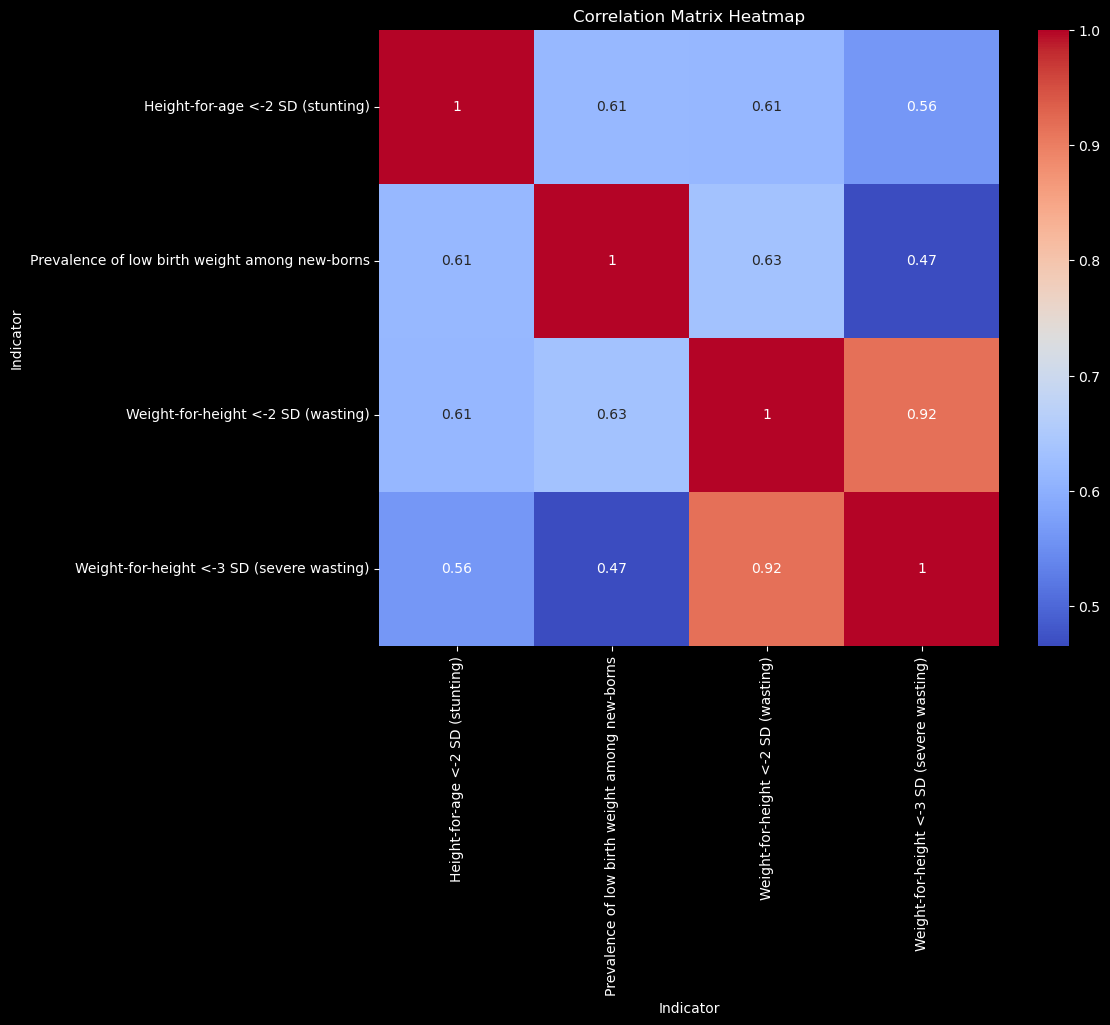

In [19]:

# Select the indicator names for correlation analysis
selected_indicators = ['Height-for-age <-2 SD (stunting)',
                       'Weight-for-height <-2 SD (wasting)', 
                       'Weight-for-height <-3 SD (severe wasting)',
                       'Prevalence of low birth weight among new-borns']

# Filter the DataFrame based on the selected indicators
filtered_df = df[df['Indicator'].isin(selected_indicators)]

# Aggregate the duplicate entries by taking the mean
pivot_data = filtered_df.pivot_table(index='Geographic area', columns='Indicator', values='Average of OBS_VALUE', aggfunc='mean')

# Create a correlation matrix
correlation_matrix = pivot_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [20]:
correlation_matrix

Indicator,Height-for-age <-2 SD (stunting),Prevalence of low birth weight among new-borns,Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting)
Indicator,,,,
Height-for-age <-2 SD (stunting),1.00,0.61,0.61,0.56
Prevalence of low birth weight among new-borns,0.61,1.00,0.63,0.47
Weight-for-height <-2 SD (wasting),0.61,0.63,1.00,0.92
Weight-for-height <-3 SD (severe wasting),0.56,0.47,0.92,1.00


#### Stunting, Wasting and Prevalence of low birth weight among new-borns have a strong relationship.  

## Stunting, Wasting and Prevalence of low birth weight relationship with income

- **Objective 4:**

>   Find the trend in countries income and malnutrition growth.

>   Hypothesis:  countries income and malnutrition growth worldwide affected with countries income.

>   Datasource:

        UNICEF_Databases_Severe_Wasting_Income.csv

## severe wating and income

### Analysis on severe wasting with income data (UNICEF_Databases_Severe_Wasting_Income.csv)

In [21]:
join = os.path.join(path, 
                    '02 Data', 
                    'Prepared Data',
                    '01 CSV',
                    '02. Exploring Relationships',
                    'UNICEF_Databases_Severe_Wasting_Income.csv')
df_income_csv = pd.read_csv(join, index_col = False, encoding= 'unicode_escape')
df_income_csv.round(2)
df_group_by = df_income_csv.groupby(['World Bank Income Groups'])['Average of National Point Estimate'].mean()

df_income_csv

,UN Regions,Countries and areas,Year*,World Bank Income Groups,Average of National Point Estimate
0,Africa,Algeria,1992,Lower Middle Income,3.00
1,Africa,Algeria,1995,Lower Middle Income,4.20
2,Africa,Algeria,2000,Lower Middle Income,1.10
3,Africa,Algeria,2002,Lower Middle Income,5.00
4,Africa,Algeria,2006,Lower Middle Income,1.70
...,...,...,...,...,...
854,Oceania,Tonga,2019,Upper Middle Income,0.40
855,Oceania,Tuvalu,2007,Upper Middle Income,0.90
856,Oceania,Tuvalu,2019,Upper Middle Income,1.30
857,Oceania,Vanuatu,2008,Lower Middle Income,1.90


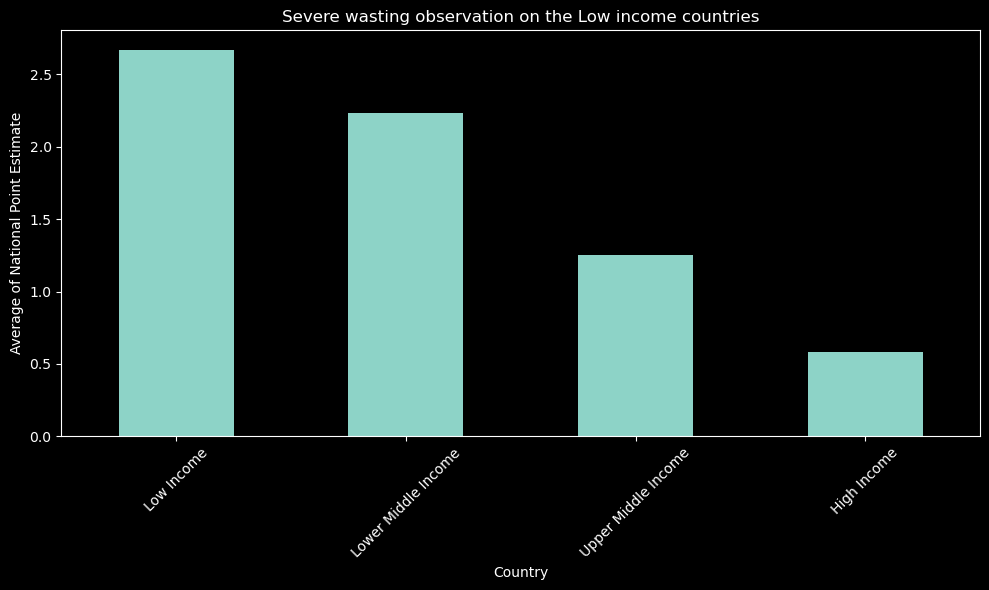

In [22]:


# Sort the countries based on the average values in descending order
sorted_countries = df_group_by.sort_values(ascending=False)

# Select the top N countries to plot
# top_countries = sorted_countries.head(10) 

# Plot the data
plt.figure(figsize=(10, 6))
sorted_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average of National Point Estimate')
plt.title('Severe wasting observation on the Low income countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
sorted_countries

World Bank Income Groups
Low Income            2.67
Lower Middle Income   2.23
Upper Middle Income   1.25
High Income           0.58
Name: Average of National Point Estimate, dtype: float64

#### It is clear from the above observation that the country’s income is directly related to the wasting rate among infants under the age of 5 years old.

In [24]:
# Aggregate the duplicate entries by taking the mean
pivot_data = df_income_csv.pivot_table(index='Countries and areas', columns='World Bank Income Groups', values='Average of National Point Estimate', aggfunc='mean')

pivot_data = pivot_data.fillna(0)

pivot_data.head(10)


World Bank Income Groups,High Income,Low Income,Lower Middle Income,Upper Middle Income
Countries and areas,,,,
Afghanistan,0.00,3.13,0.00,0.00
Albania,0.00,0.00,0.00,3.37
Algeria,0.00,0.00,2.53,0.00
Angola,0.00,0.00,2.47,0.00
Argentina,0.00,0.00,0.00,0.45
Armenia,0.00,0.00,0.00,1.60
Australia,0.00,0.00,0.00,0.00
Azerbaijan,0.00,0.00,0.00,2.58
Bangladesh,0.00,0.00,2.94,0.00


## Top 10 Low-Income Countries Most Affected by Severe Wasting.

<Figure size 1000x600 with 0 Axes>

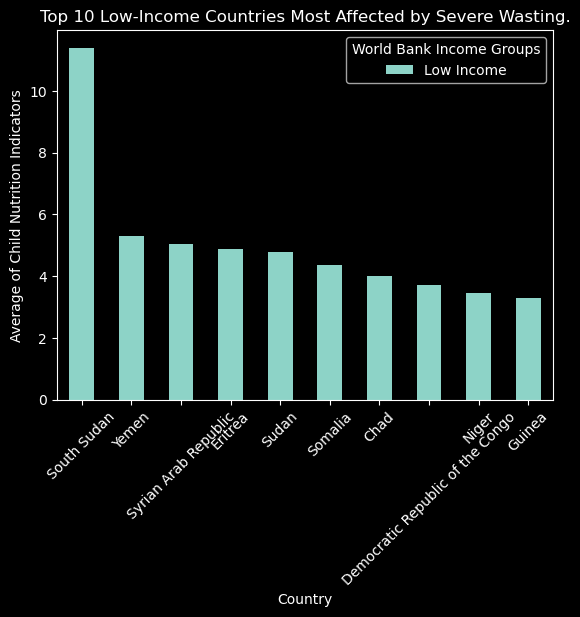

In [25]:
# The DataFrame pivot_data is sorted in descending order based on the 'Low Income' column. 
# The sorted DataFrame is stored in the variable sorted_df.
sorted_df = pivot_data.sort_values(by='Low Income', ascending=False)

# The top 10 rows of the 'Low Income' column from the sorted_df DataFrame are 
# selected and stored in the variable Low_income_countries
Low_income_countries = sorted_df[['Low Income']].head(10)

# Plot the data. A new figure is created with a figure size of 10 inches in width and 6 inches in height.
plt.figure(figsize=(10, 6))

# The data in Low_income_countries is plotted as a bar chart.
Low_income_countries.plot(kind='bar')
plt.xlabel('Country')

# Sets the y-axis label as 'Average of Child Nutrition Indicators' using 
plt.ylabel('Average of Child Nutrition Indicators')

# Sets the title of the plot as 'Top 10 Low-Income Countries Most Affected by Stunting.' 
plt.title('Top 10 Low-Income Countries Most Affected by Severe Wasting.')

#Rotates the x-axis tick labels by 45 degrees using 
plt.xticks(rotation=45)

# Displays the plot.
plt.show()

In [26]:
Low_income_countries

World Bank Income Groups,Low Income
Countries and areas,
South Sudan,11.40
Yemen,5.30
Syrian Arab Republic,5.03
Eritrea,4.87
Sudan,4.77
Somalia,4.35
Chad,4.00
Democratic Republic of the Congo,3.72
Niger,3.44


In [27]:
# Aggregate the duplicate entries by taking the mean
pivot_data = df_income_csv.pivot_table(index='Countries and areas', columns='World Bank Income Groups', values='Average of National Point Estimate', aggfunc='mean')

pivot_data = pivot_data.fillna(0)

pivot_data.head(10)


World Bank Income Groups,High Income,Low Income,Lower Middle Income,Upper Middle Income
Countries and areas,,,,
Afghanistan,0.00,3.13,0.00,0.00
Albania,0.00,0.00,0.00,3.37
Algeria,0.00,0.00,2.53,0.00
Angola,0.00,0.00,2.47,0.00
Argentina,0.00,0.00,0.00,0.45
Armenia,0.00,0.00,0.00,1.60
Australia,0.00,0.00,0.00,0.00
Azerbaijan,0.00,0.00,0.00,2.58
Bangladesh,0.00,0.00,2.94,0.00


## Scatter plot with Sever Wasting and lower income countries

Low income countries that affected by severe wasting
World Bank Income Groups          Low Income
Countries and areas                         
South Sudan                            11.40
Yemen                                   5.30
Syrian Arab Republic                    5.03
Eritrea                                 4.87
Sudan                                   4.77
Somalia                                 4.35
Chad                                    4.00
Democratic Republic of the Congo        3.72
Niger                                   3.44
Guinea                                  3.28


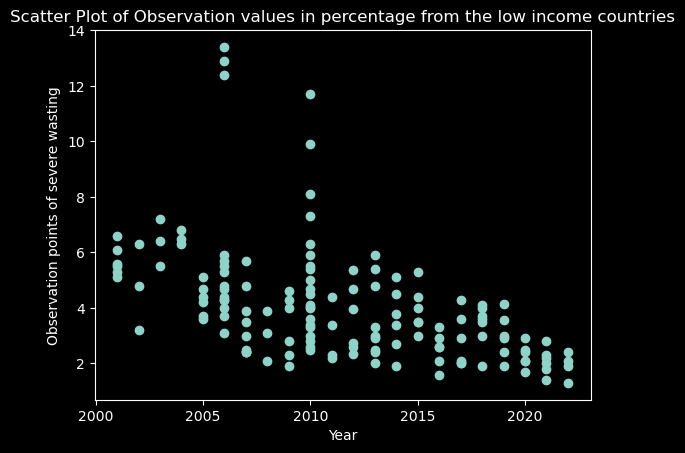

In [28]:
# Filter the data for the desired variables

wasting_data = df[df['Indicator'] == 'Weight-for-height <-3 SD (severe wasting)']

selected_countries_df = wasting_data[wasting_data['Geographic area'].isin(Low_income_countries.index.to_list())]

print('Low income countries that affected by severe wasting')
print(Low_income_countries)

years = selected_countries_df['YEAR']
avg_obs_values = selected_countries_df['Average of OBS_VALUE']

# Create the scatter plot
plt.scatter(years, avg_obs_values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Observation points of severe wasting')
plt.title('Scatter Plot of Observation values in percentage from the low income countries')

# Show the plot
plt.show()

#### From above scatter plot it is clear Severe wasting reducing in Low income countries over the years

###  Pairplot on global severe wasting data

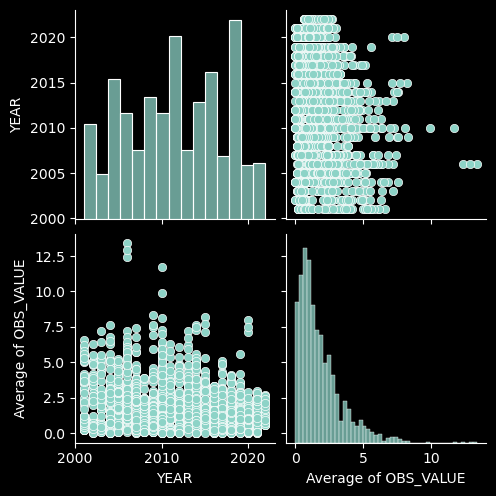

In [29]:
# Filter the desired variables
variables = ['YEAR', 'Average of OBS_VALUE']

# Subset the DataFrame based on the desired variables
subset_df = wasting_data[variables]

# Create pair plots
sns.pairplot(subset_df)

# Display the pair plots
plt.show()

### CCategorical plot on severe global wasting among different genders

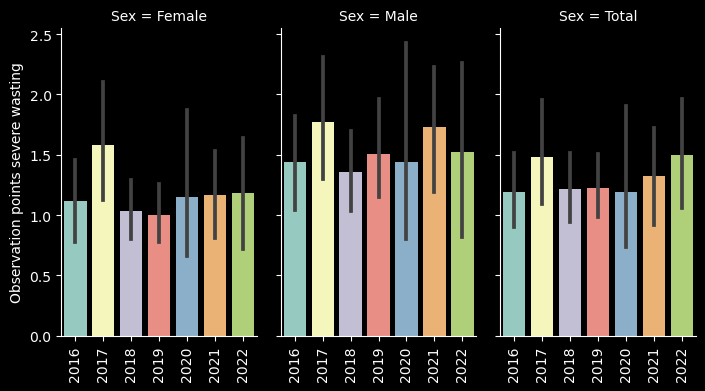

In [30]:

filtered_years = wasting_data.loc[df['YEAR'] > 2015]


g = sns.catplot(
    data=filtered_years, x="YEAR", y="Average of OBS_VALUE", col="Sex",
    kind="bar", height=4, aspect=.6,
)

g.set_axis_labels("", "Observation points severe wasting")
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()


#### Categorical plot depecting the  severity wasting among global data

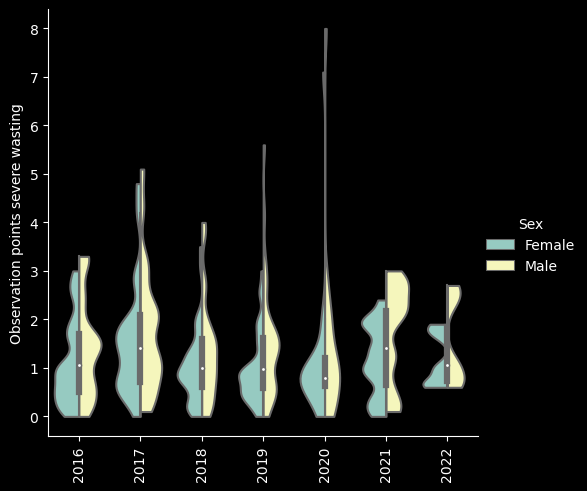

In [31]:
# Select the indicator names for correlation analysis
selected_gender = ['Male','Female']


filtered_df = filtered_years[filtered_years['Sex'].isin(selected_gender) ]

g = sns.catplot(
    data=filtered_df, x="YEAR", y="Average of OBS_VALUE", hue="Sex",
    kind="violin", bw=.25, cut=0, split=True,
)


g.set_axis_labels("", "Observation points severe wasting")
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()

In [32]:
filtered_df.dtypes

Geographic area          object
YEAR                      int64
Indicator                object
Sex                      object
Average of OBS_VALUE    float64
dtype: object

In [33]:
filtered_df['YEAR'] = filtered_df['YEAR'].astype(str)


C:\Users\mutta\AppData\Local\Temp\ipykernel_10156\2584217600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YEAR'] = filtered_df['YEAR'].astype(str)


In [34]:
filtered_df.dtypes

Geographic area          object
YEAR                     object
Indicator                object
Sex                      object
Average of OBS_VALUE    float64
dtype: object